In [24]:
# https://www.kaggle.com/brsdincer/heart-attack-prediction-detailed-explanation
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, ShuffleSplit, GridSearchCV 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
import seaborn as sns 

In [13]:
filterwarnings('ignore')

In [18]:
# DATA SOURCE
Heart = pd.read_csv('C:\\Users\\shota\\Documents\\Data\\Kaggle\\kd_heart_attack\\heart.csv')
data = Heart.copy()

# ここでのカテゴリー型への変換は、箱ひげ図やバーの表示時に役に立つ
dataV  = data.copy()
dataV['sex'] = pd.Categorical(dataV['sex'])              
dataV['cp'] = pd.Categorical(dataV['cp'])
dataV['fbs'] = pd.Categorical(dataV['fbs'])
dataV['restecg'] = pd.Categorical(dataV['restecg'])
dataV['exng'] = pd.Categorical(dataV['exng'])
dataV['slp'] = pd.Categorical(dataV['slp'])
dataV['caa'] = pd.Categorical(dataV['caa'])
dataV['thall'] = pd.Categorical(dataV['thall'])
dataV['output'] = pd.Categorical(dataV['output'])

df = data.select_dtypes(include=['float64', 'int64', 'int32'])     # 指定したタイプのデータを抽出

In [20]:
data['output']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [19]:
dataV['output']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
# pd.Categorical()     # category型に変換
"""
例
pd.Categorical(['a', 'b', 'c', 'a', 'b', 'c'])
['a', 'b', 'c', 'a', 'b', 'c']
Categories (3, object): ['a', 'b', 'c']
"""

In [ ]:
# INFORMATIONS

In [ ]:
"""
About dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack
"""

In [21]:
print(data.shape)
print('------'*20)
print(data.columns)
print('------'*20)
print(data.info())
print('------'*20)
print(data.describe())
print('------'*20)
print(data.corr())      # 各列の間の相関係数が算出される (heatmapで可視化可能(seaborn))
print('------'*20)
print(data['sex'].value_counts())      # value_counts(): それぞれの値の出現回数をカウントしてくれる。
print('------'*20)
print(data['cp'].value_counts())    
print('------'*20)
print(data['fbs'].value_counts())
print('------'*20)
print(data['restecg'].value_counts())
print('------'*20)
print(data['exng'].value_counts())
print('------'*20)
print(data['slp'].value_counts())
print('------'*20)
print(data['caa'].value_counts())
print('------'*20)
print(data['thall'].value_counts())
print('------'*20)
print(data['output'].value_counts())
print('------'*20)
print(data.groupby(['sex', 'output']).mean(['trtbps']))    # resting blood pressure (in mm Hg)
print('------'*20)
print(data.groupby(['sex', 'output']).mean(['chol']))     # cholestoral in mg/dl fetched via BMI sensor
print('------'*20)
print(data.groupby(['sex', 'output']).mean(['thalachh']))   # maximum heart rate achieved
print('------'*20)
print(data.groupby(['sex', 'output']).mean(['oldpeak']))
print('------'*20)
print(data.isnull().sum())     # Nanの数を調べている

(303, 14)
------------------------------------------------------------------------------------------------------------------------
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303

In [22]:
# CORRELATION - NORMALITY - HOMOGENEITY
corrPearson = data.corr(method='pearson')    # ピアソンの積率相関係数の無相関検定を行う(関係は線形)
corrSpearman = data.corr(method='spearman')   # スピアマンの順位相関係数の無相関検定を行う(単調（スピアマン）関係)

# 上記の違い: https://support.minitab.com/ja-jp/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/correlation-and-covariance/a-comparison-of-the-pearson-and-spearman-correlation-methods/

In [ ]:
# 無相関検定  :   https://liginc.co.jp/305968
"""
ある標本をとって、その相関係数を求めたときに、その相関係数に意味があるのかどうかを決めることを「無相関検定」
"""

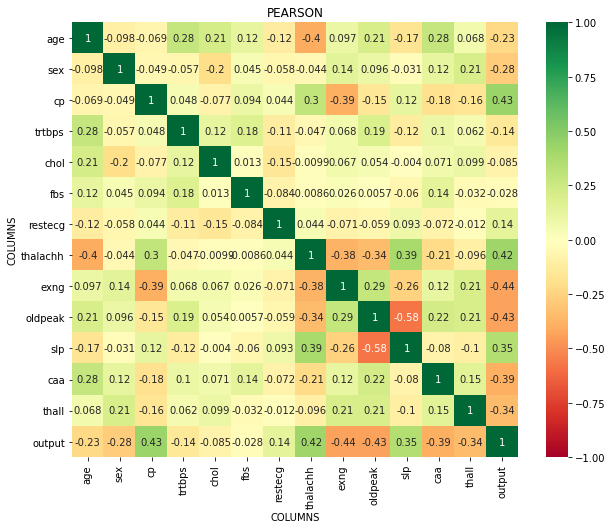

In [32]:
# PEARSON CORRELATION
figure = plt.figure(figsize=(10, 8))  # 幅、高さ
sns.heatmap(corrPearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)  # annotで数値を表示するかを指定。vmin, vmax でカラーの幅を指定
plt.title('PEARSON')
plt.xlabel('COLUMNS')
plt.ylabel('COLUMNS')
plt.show()

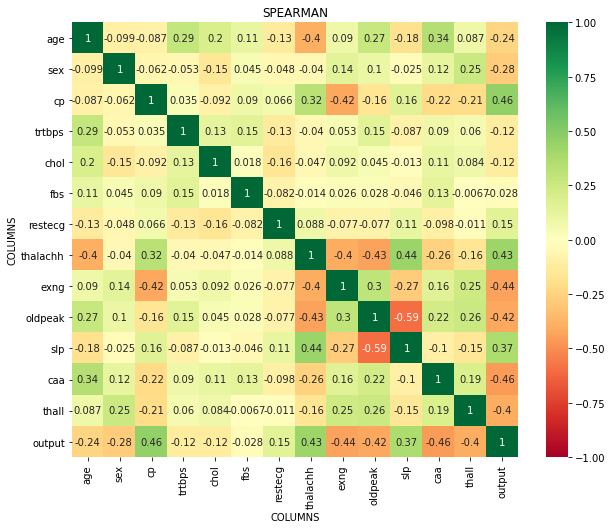

In [33]:
# SPEARMAN CORRELATION
figure = plt.figure(figsize=(10, 8))
sns.heatmap(corrSpearman, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('SPEARMAN')
plt.xlabel('COLUMNS')
plt.ylabel('COLUMNS')
plt.show()

In [34]:
# NORMALITY
for i in data.columns:
    print('-----'*10)
    print('%.3f - %.3f' % shapiro(data[i]))    #シャピロ–ウィルク検定:  統計学において、標本 x1, ..., xn が正規分布に従う母集団からサンプリングされたものであるという帰無仮説を検定する検定
    
# 検定統計量, p値

--------------------------------------------------
0.986 - 0.006
--------------------------------------------------
0.586 - 0.000
--------------------------------------------------
0.790 - 0.000
--------------------------------------------------
0.966 - 0.000
--------------------------------------------------
0.947 - 0.000
--------------------------------------------------
0.424 - 0.000
--------------------------------------------------
0.679 - 0.000
--------------------------------------------------
0.976 - 0.000
--------------------------------------------------
0.591 - 0.000
--------------------------------------------------
0.844 - 0.000
--------------------------------------------------
0.745 - 0.000
--------------------------------------------------
0.728 - 0.000
--------------------------------------------------
0.751 - 0.000
--------------------------------------------------
0.634 - 0.000


In [36]:
for i in data.columns:
    print(shapiro(data[i]))

ShapiroResult(statistic=0.9863715767860413, pvalue=0.005801409482955933)
ShapiroResult(statistic=0.5857275724411011, pvalue=2.750285276260118e-26)
ShapiroResult(statistic=0.7901582717895508, pvalue=1.857025903554317e-19)
ShapiroResult(statistic=0.965917706489563, pvalue=1.4580031120203785e-06)
ShapiroResult(statistic=0.9468814134597778, pvalue=5.364669153351542e-09)
ShapiroResult(statistic=0.4239872097969055, pvalue=5.430913299217107e-30)
ShapiroResult(statistic=0.6793191432952881, pvalue=1.378427146790608e-23)
ShapiroResult(statistic=0.9763151407241821, pvalue=6.620329077122733e-05)
ShapiroResult(statistic=0.5912637710571289, pvalue=3.8468651050195e-26)
ShapiroResult(statistic=0.8441833853721619, pvalue=8.18340235561653e-17)
ShapiroResult(statistic=0.7446511387825012, pvalue=2.5741521389352104e-21)
ShapiroResult(statistic=0.7281151413917542, pvalue=6.270960025237855e-22)
ShapiroResult(statistic=0.7505781054496765, pvalue=4.34283594470656e-21)
ShapiroResult(statistic=0.6335940361022949

In [37]:
# HOMOGENEITY  : いくつかの群の分散が等しいかどうかを検定すること。検定統計量がF分布に従うのでF検定とも呼ばれる
print('%.4f - %.4f' % levene(data["age"],data["sex"],data["cp"],data["trtbps"],data["chol"],
                             data["fbs"],data["restecg"],data["thalachh"],data["exng"],data["oldpeak"],
                             data["slp"],data["caa"],data["thall"],data["output"]))

335.1972 - 0.0000


In [38]:
levene(data["age"],data["sex"],data["cp"],data["trtbps"],data["chol"],
                             data["fbs"],data["restecg"],data["thalachh"],data["exng"],data["oldpeak"],
                             data["slp"],data["caa"],data["thall"],data["output"])
# F値, P値

LeveneResult(statistic=335.19718331193377, pvalue=0.0)

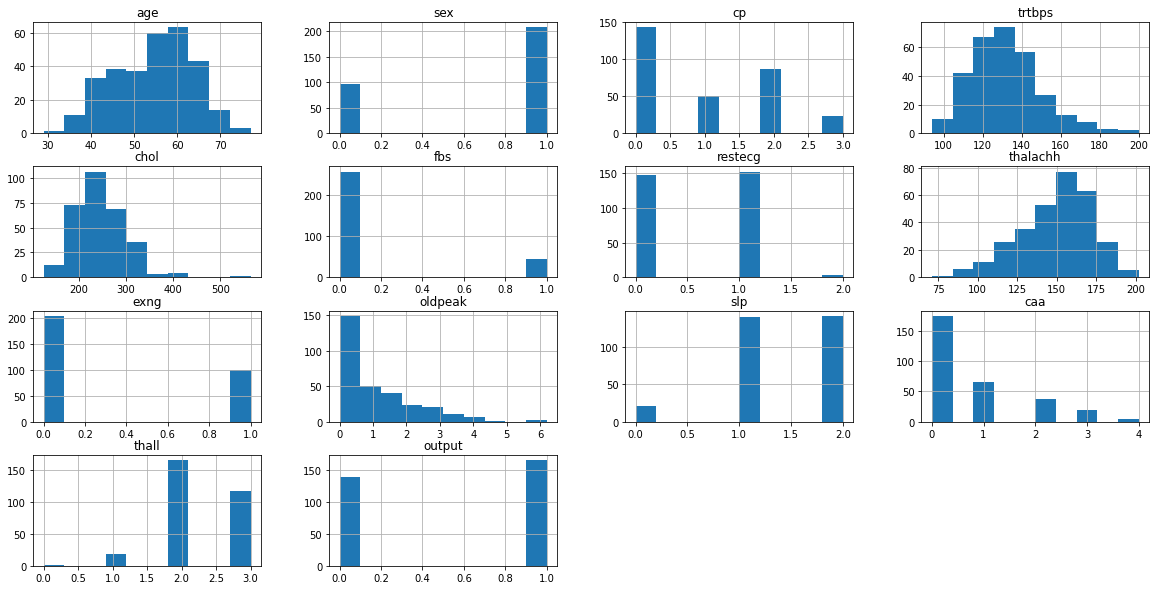

In [39]:
# VISUALIZATION
# HIST
data.hist(figsize=(20, 10))
plt.show()

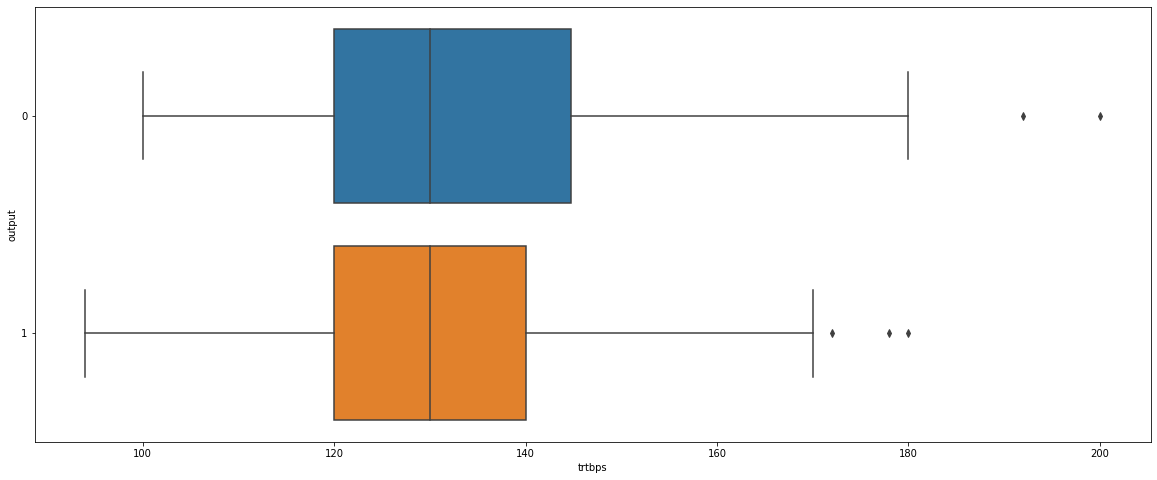

In [44]:
# BOX
figure = plt.figure(figsize=(20, 8))
sns.boxplot(x='trtbps', y='output', data=dataV)
plt.show()

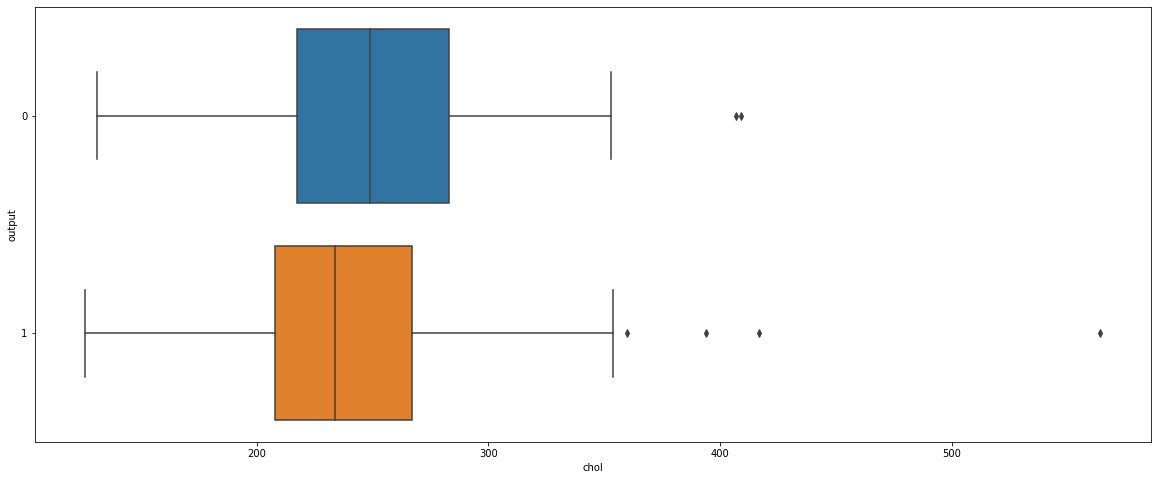

In [45]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x='chol', y='output', data=dataV)
plt.show()

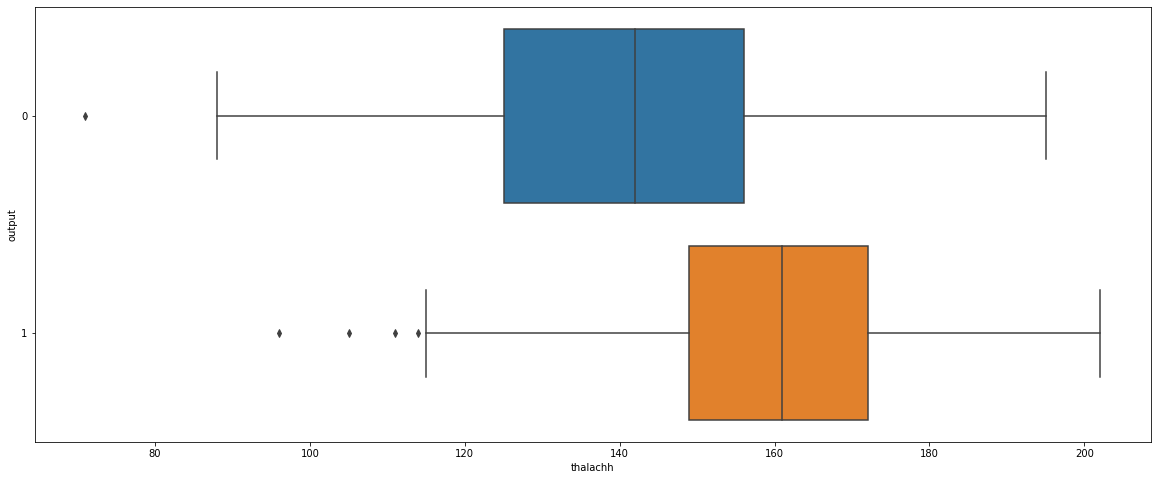

In [46]:
figure = plt.figure(figsize=(20, 8))
sns.boxplot(x='thalachh', y='output', data=dataV)
plt.show()

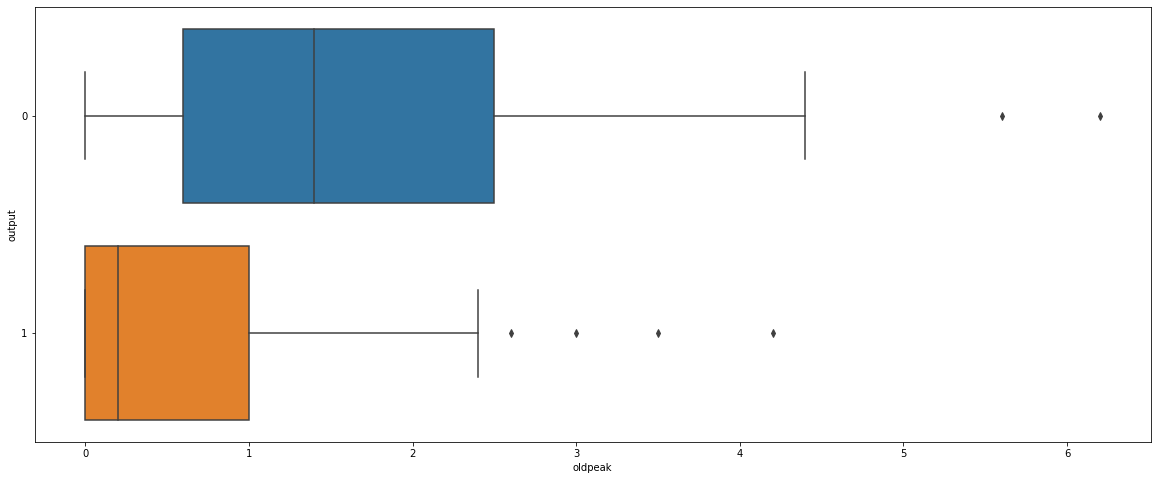

In [47]:
figure = plt.figure(figsize=(20, 8))
sns.boxplot(x='oldpeak', y='output', data=dataV)
plt.show()

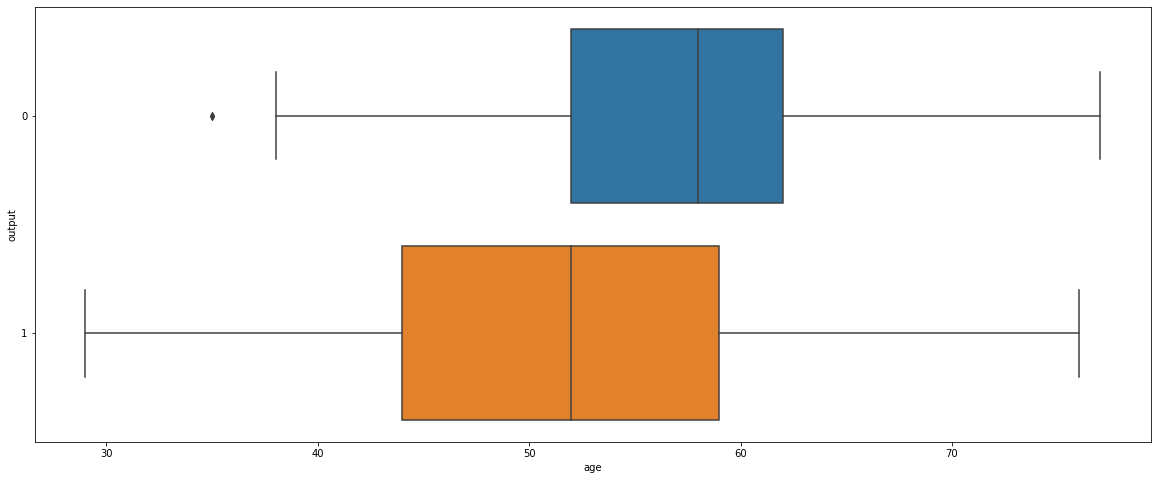

In [52]:
figure = plt.figure(figsize=(20, 8))
sns.boxplot(x='age', y='output', data=dataV)
plt.show()

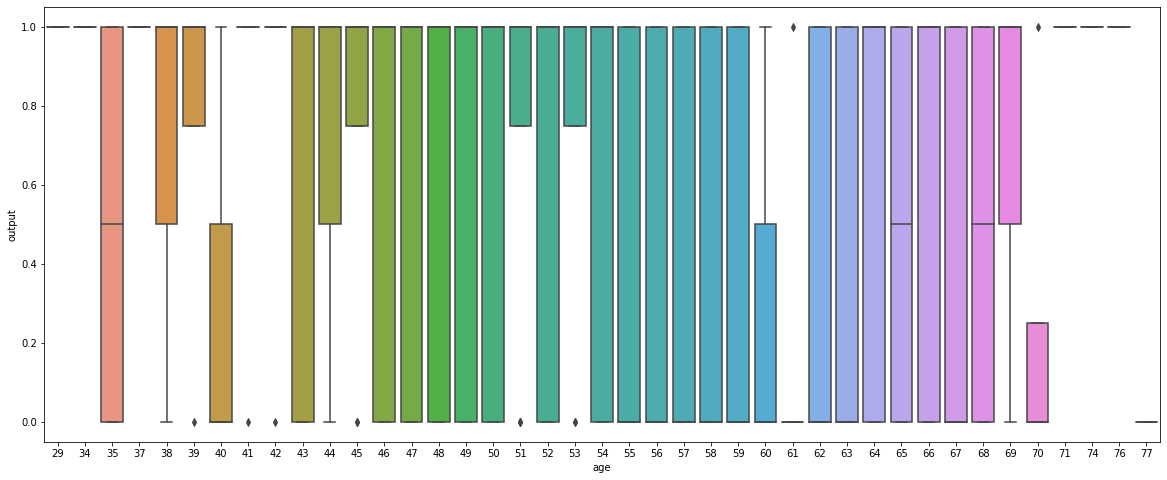

In [54]:
# data=dataとしたケース
figure = plt.figure(figsize=(20, 8))
sns.boxplot(x='age', y='output', data=data)
plt.show()

# こうなる原因はoutputの列が数値として認識され、数値の幅を考慮して出してしまうからと考えられる。(category型にする必要あり(非連続的な値として認識させるため))

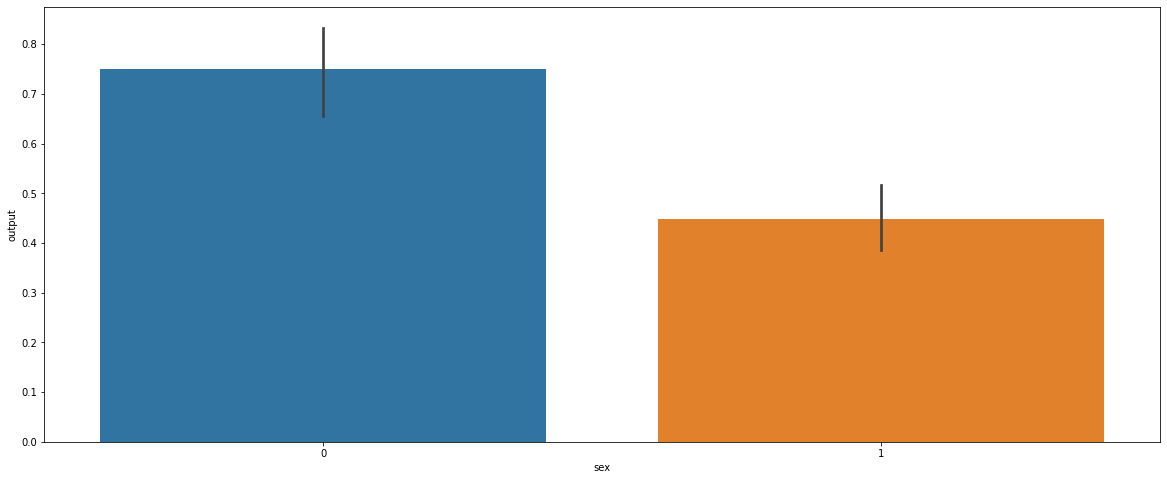

In [50]:
# BAR
figure = plt.figure(figsize=(20, 8))
sns.barplot(x='sex', y='output', data=data)      # data=dataVだと、数値ではないとしてエラーとなる(category型のためと思われる)
# sns.barplot(): xごとにyの平均値を表示

plt.show()

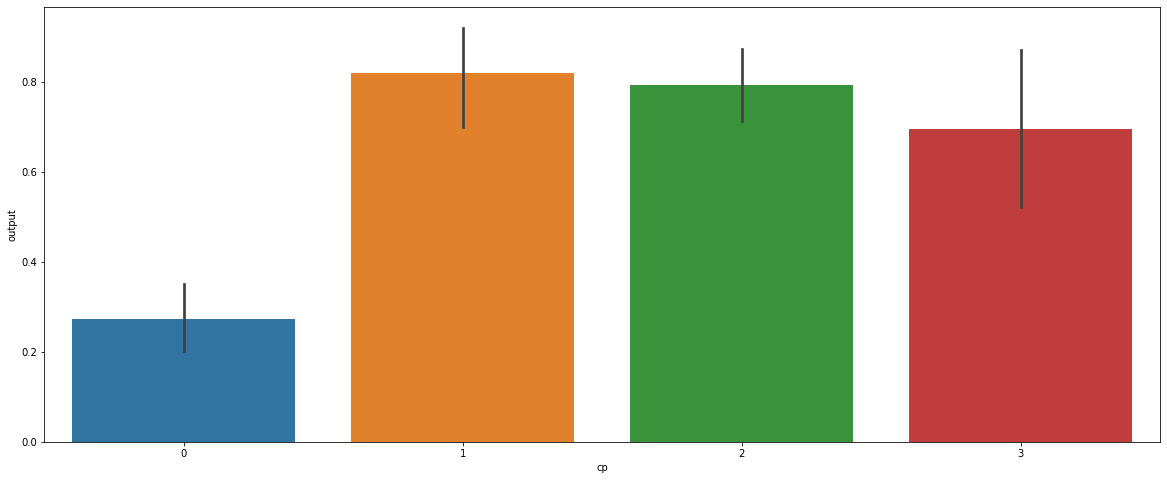

In [58]:
figure = plt.figure(figsize=(20, 8))
sns.barplot(x='cp', y='output', data=data)
plt.show()

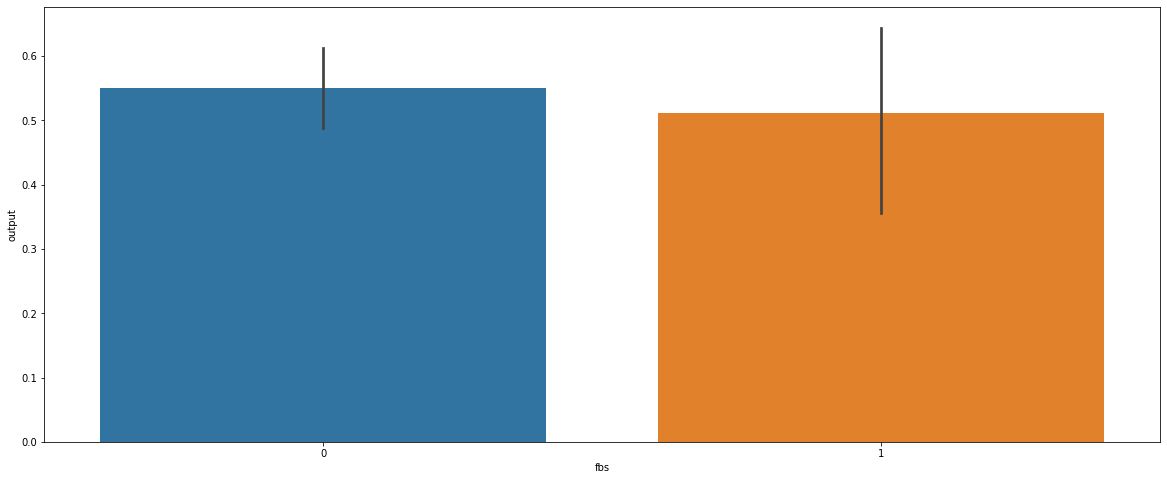

In [59]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x='fbs', y='output', data=data)
plt.show()

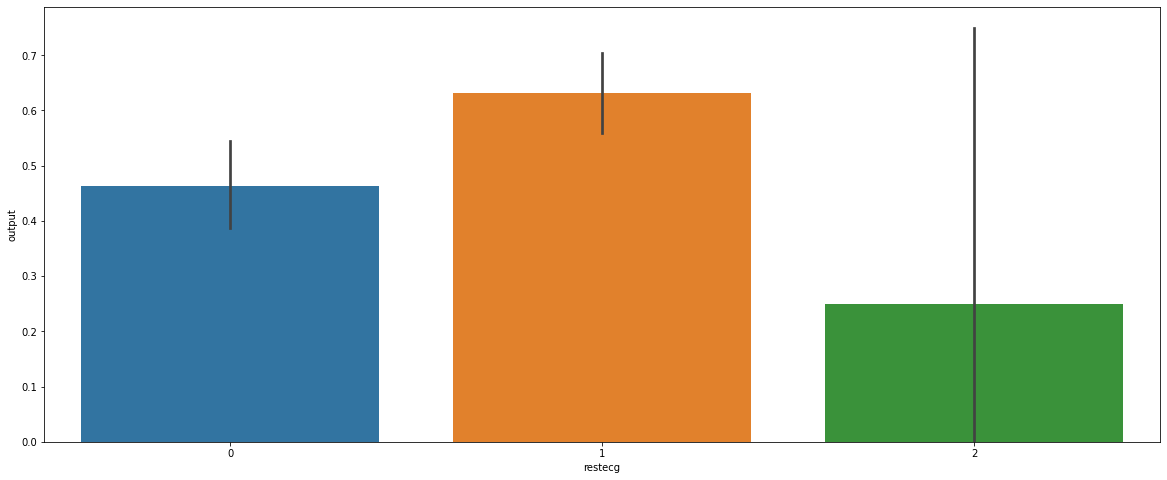

In [60]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x='restecg', y='output', data=data)
plt.show()

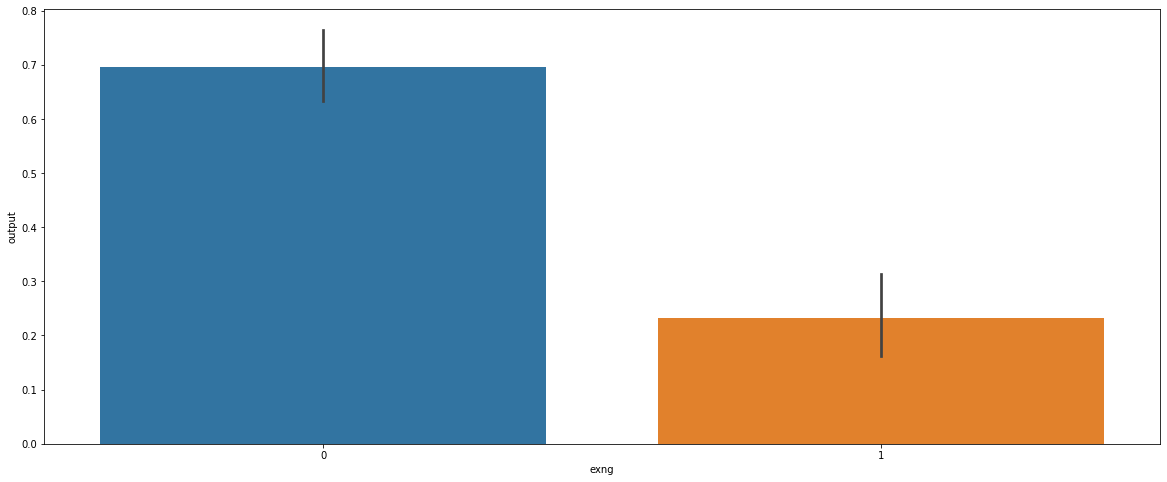

In [61]:
figure = plt.figure(figsize=(20, 8))
sns.barplot(x='exng', y='output', data=data)
plt.show()

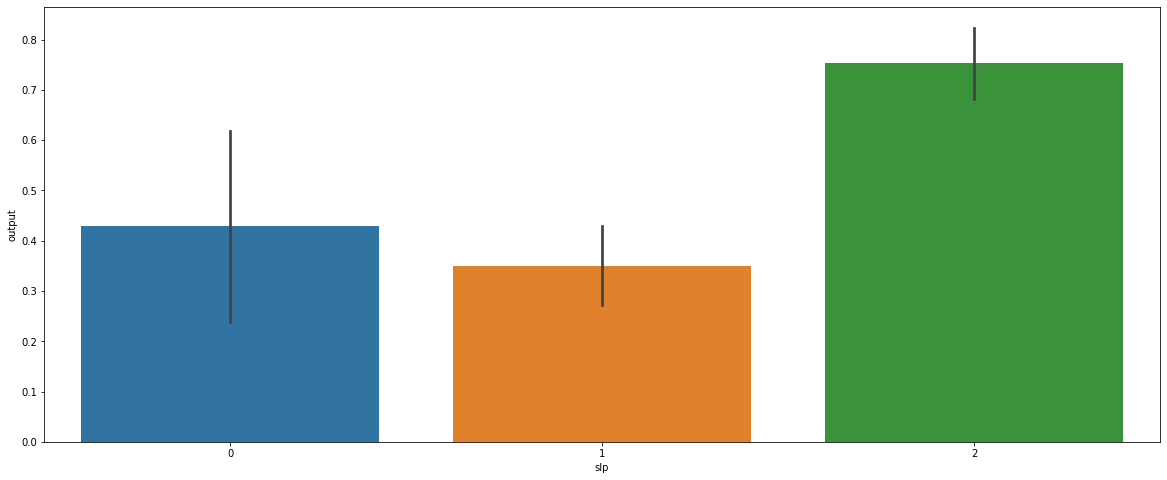

In [62]:
figure = plt.figure(figsize=(20, 8))
sns.barplot(x='slp', y='output', data=data)
plt.show()

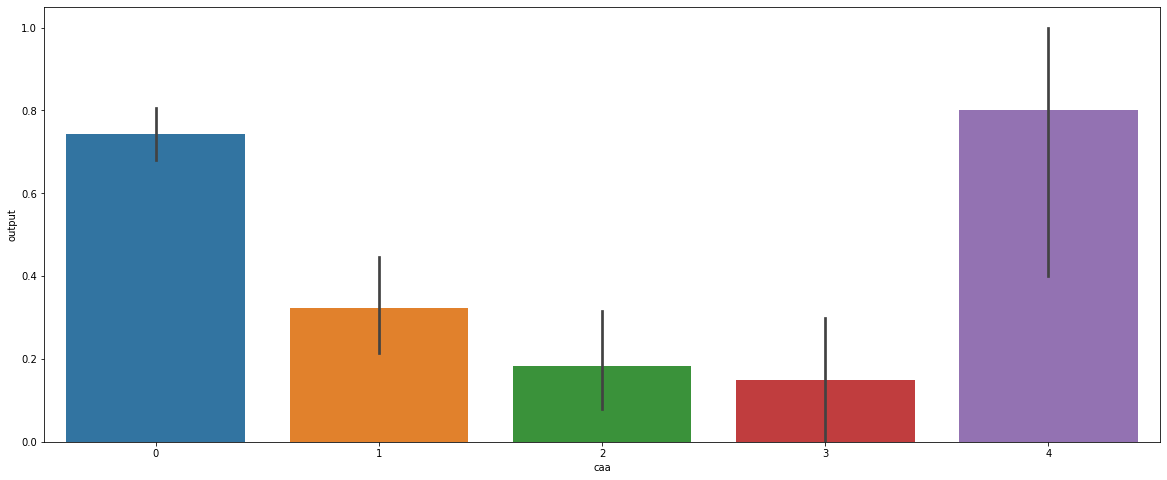

In [63]:
figure = plt.figure(figsize=(20, 8))
sns.barplot(x='caa', y='output', data=data)
plt.show()

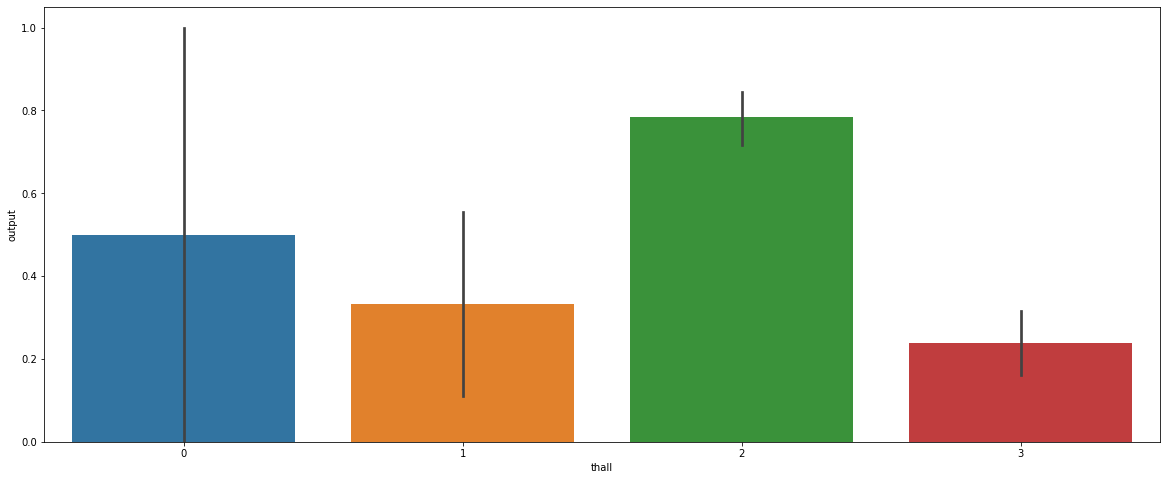

In [64]:
figure = plt.figure(figsize=(20, 8))
sns.barplot(x='thall', y='output', data=data)
plt.show()

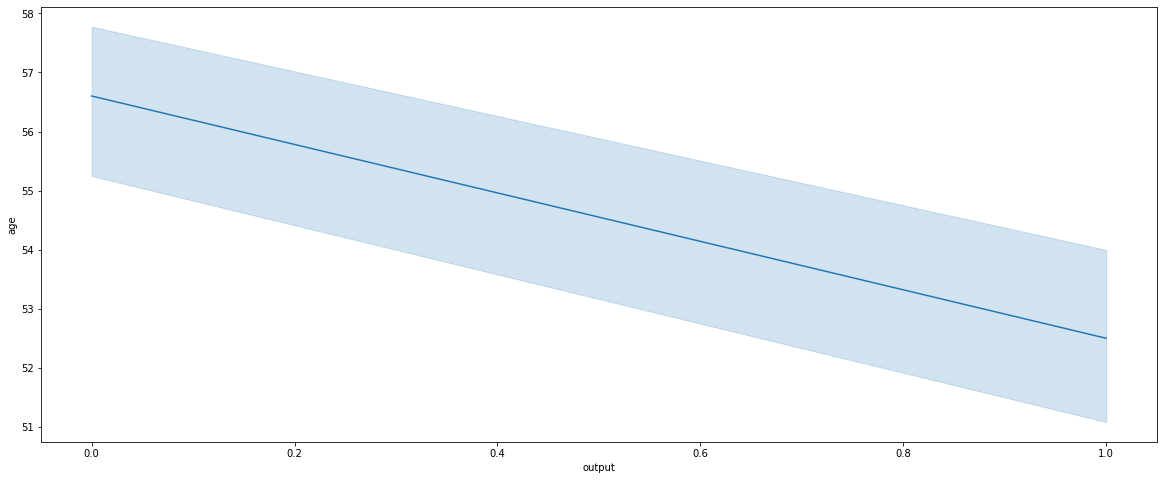

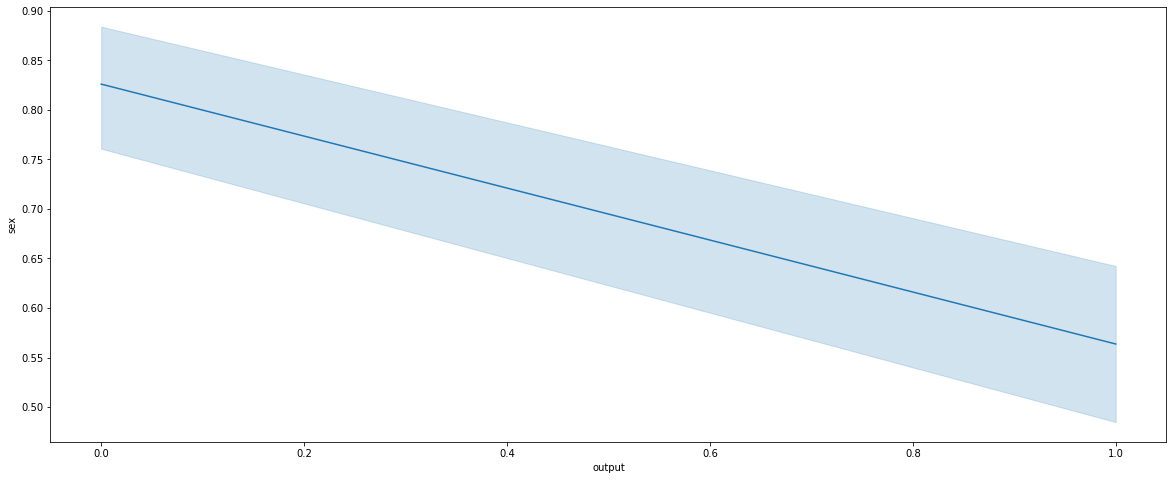

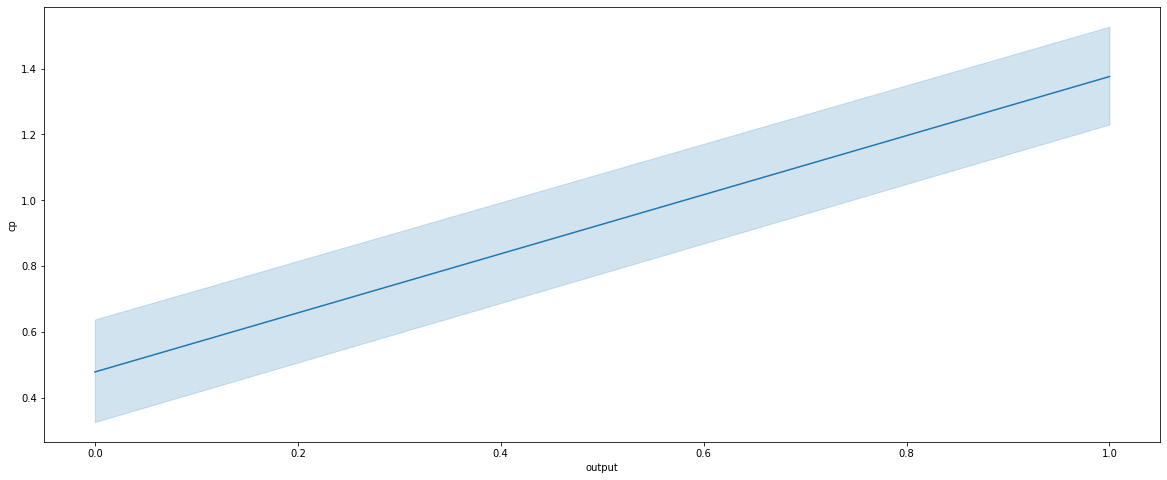

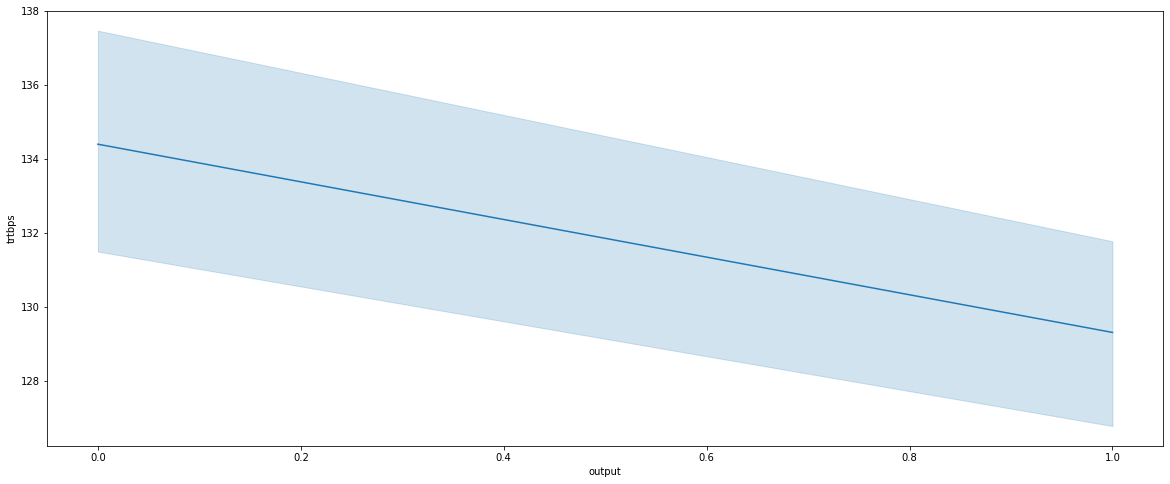

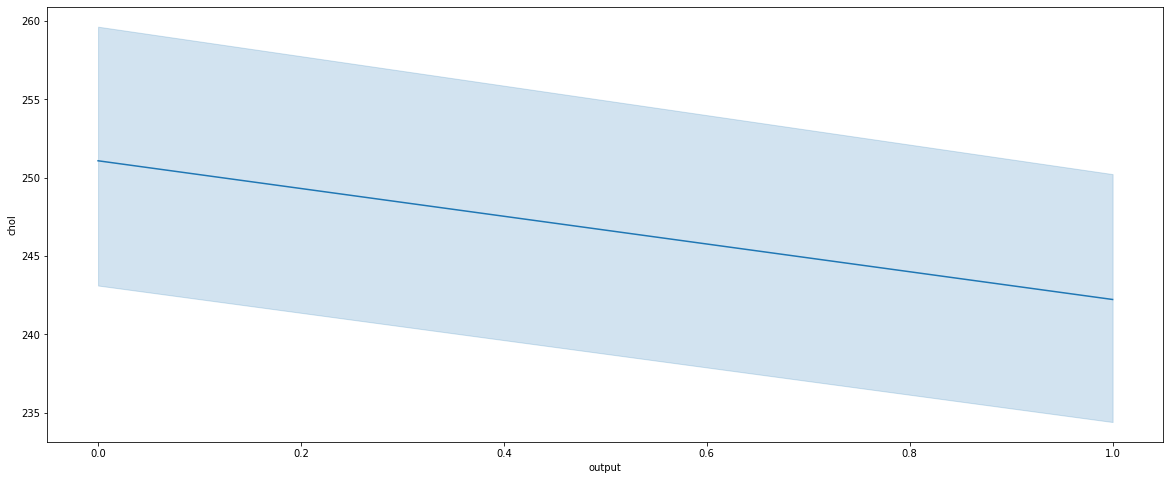

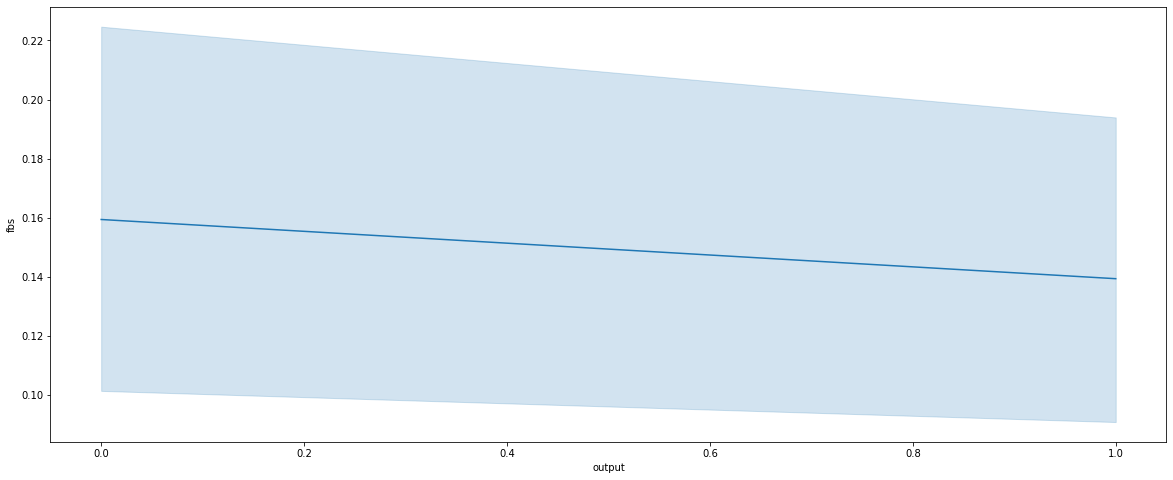

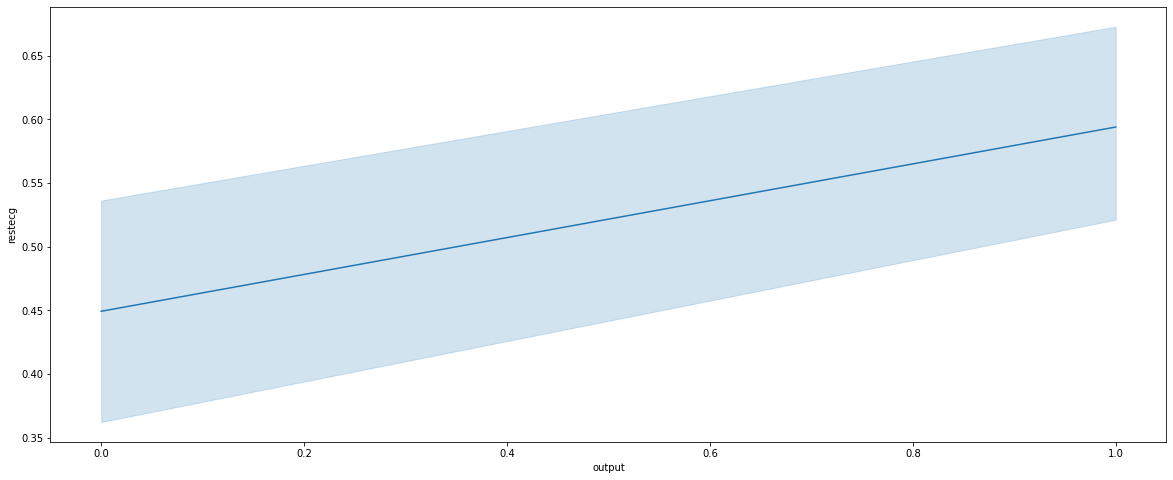

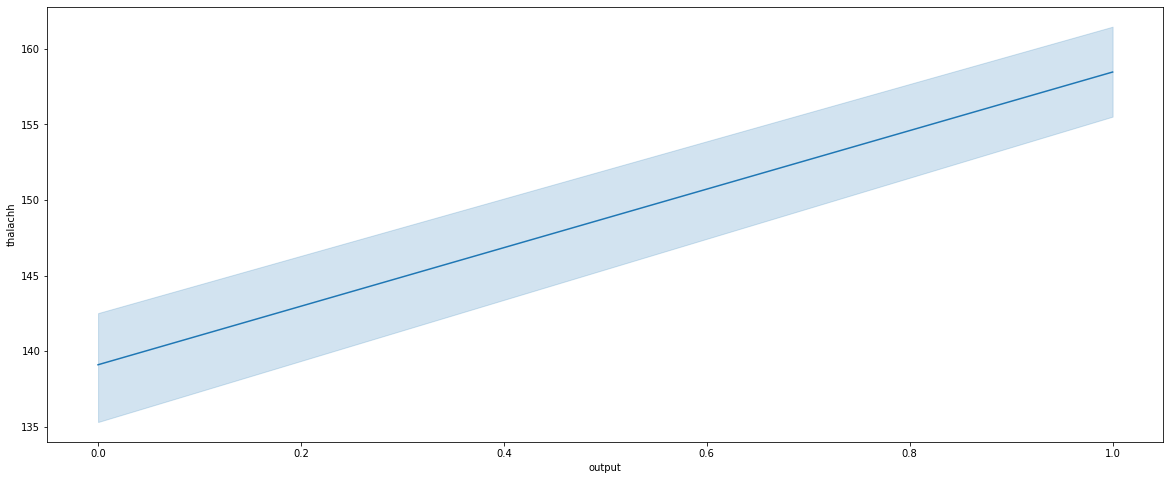

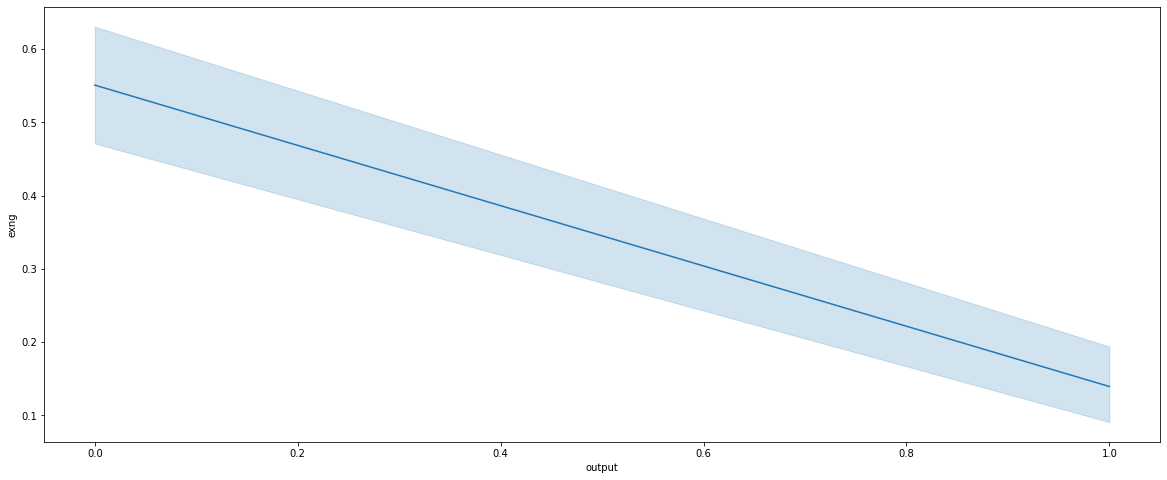

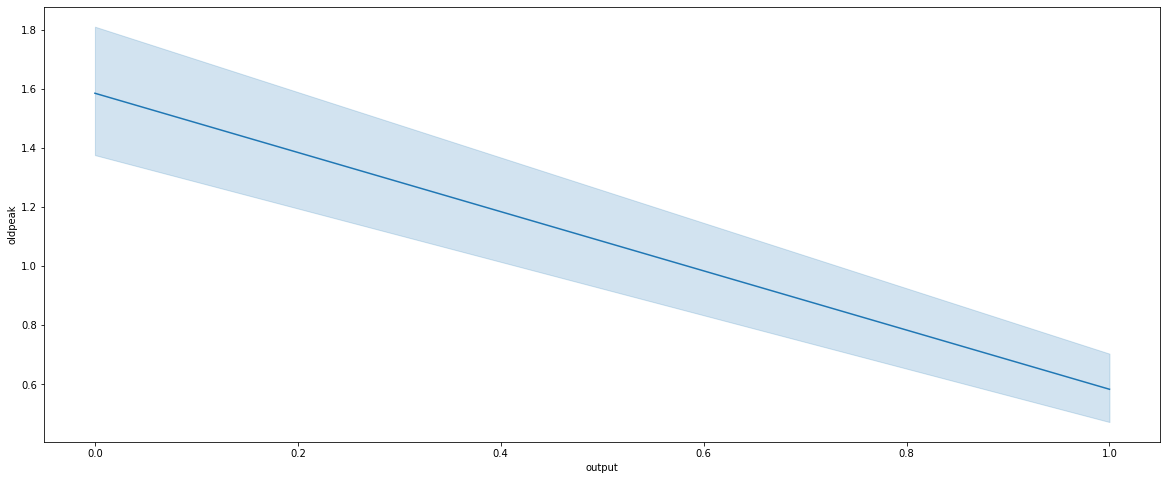

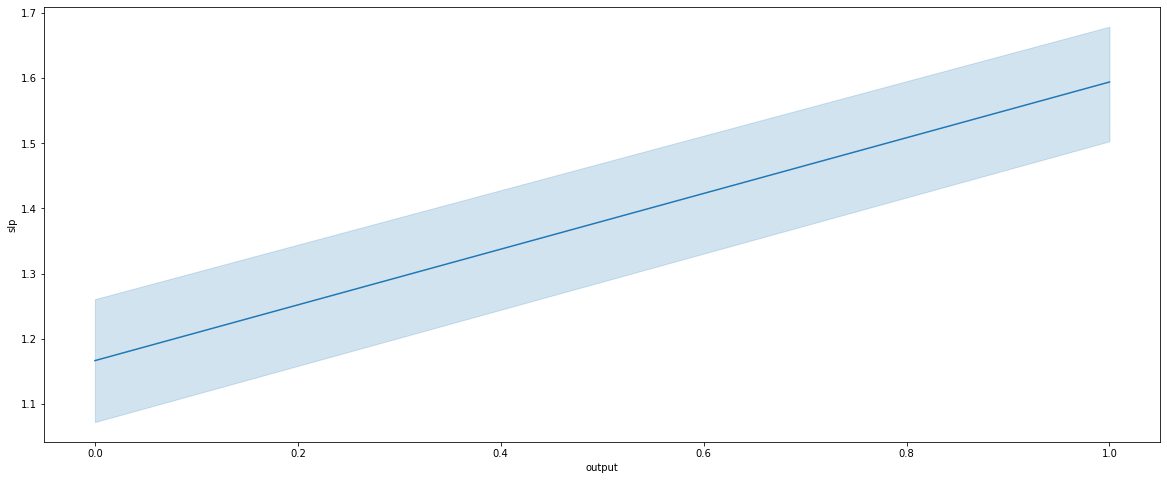

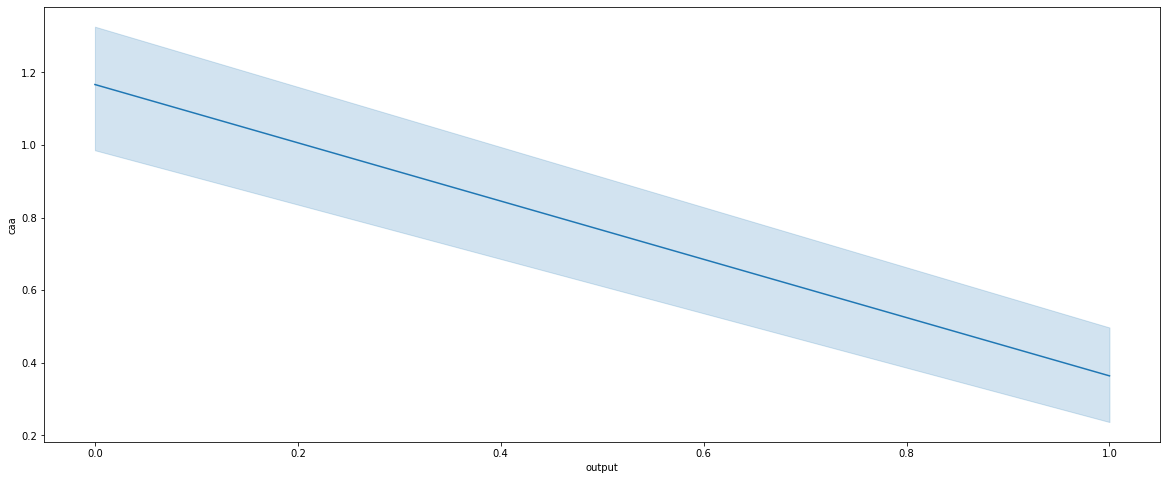

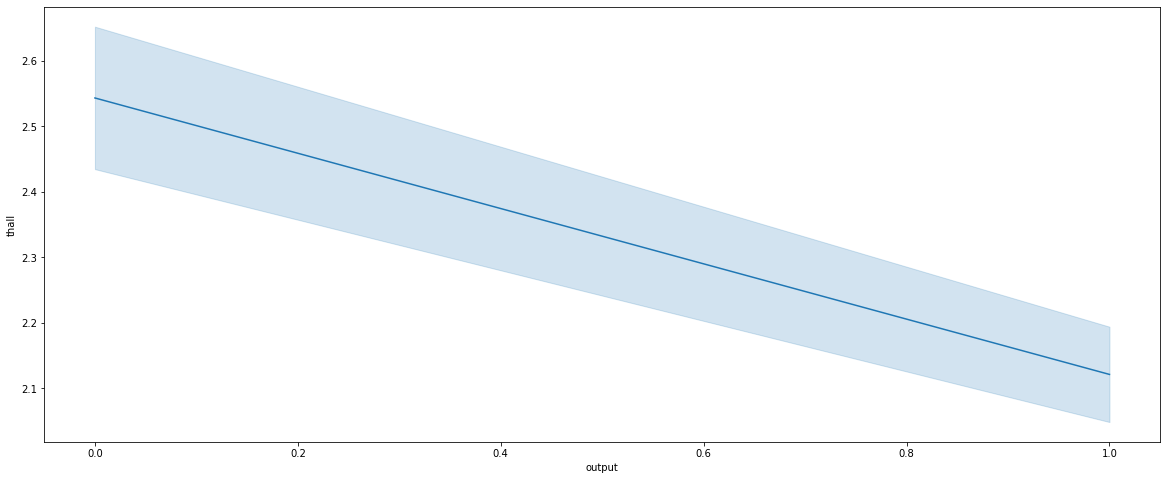

In [65]:
# LINE
rand = 0
for i in data.columns:
    rand += 1
    if rand < len(data.columns):    #outputのコラムを除くすべてのコラムに対して行うという意味
        figure = plt.figure(figsize=(20, 8))
        sns.lineplot(x='output', y=i, data=data)
        plt.show()
    else:
        break

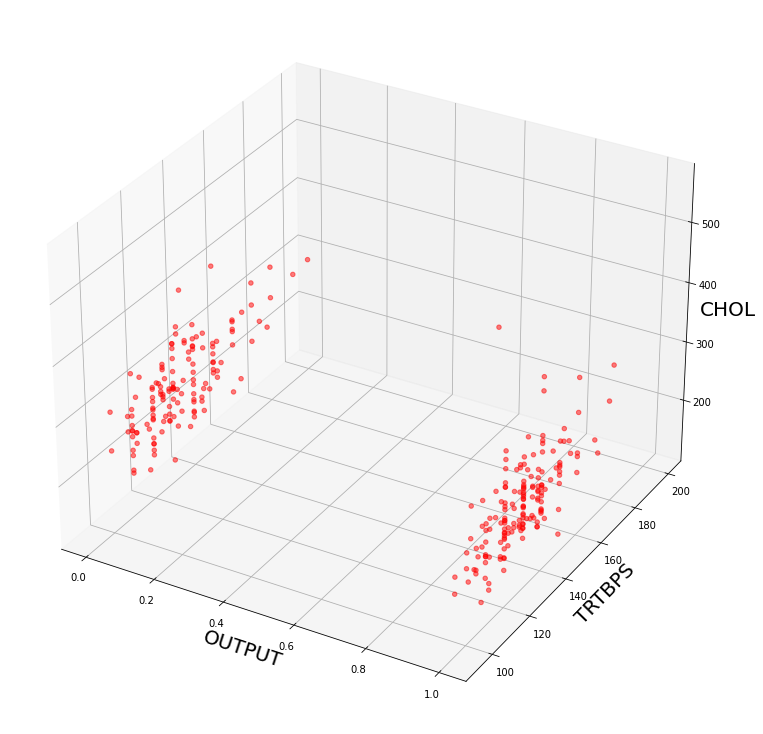

In [89]:
# 3D
#%matplotlib inline
#%matplotlib nbagg
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.set_xlabel('OUTPUT', fontsize=20)
ax.set_ylabel('TRTBPS', fontsize=20)
ax.set_zlabel('CHOL', fontsize=20)
ax.scatter(xs=dataV['output'], ys=dataV['trtbps'], zs=dataV['chol'], c='red', s=20, alpha=0.5)   # sで点の大きさを指定, alphaで点の濃さを指定
plt.show()

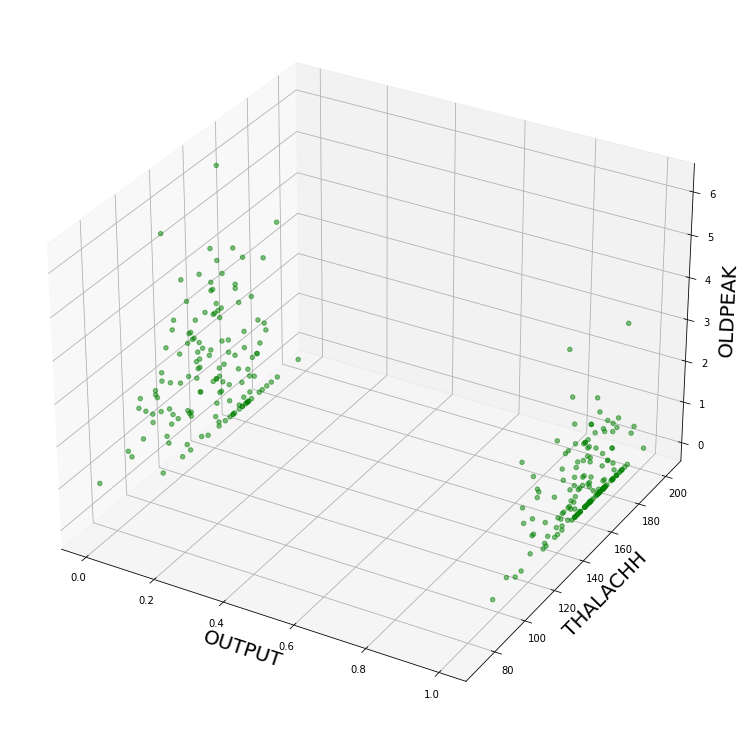

In [90]:
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.set_xlabel('OUTPUT', fontsize=20)
ax.set_ylabel('THALACHH', fontsize=20)
ax.set_zlabel('OLDPEAK', fontsize=20)
ax.scatter3D(dataV['output'], dataV['thalachh'], dataV['oldpeak'], c='green', s=20, alpha=0.5)
plt.show()

In [80]:
# AGAINST VALUES
DataForA = data.copy()

In [92]:
clf = LocalOutlierFactor()   # 外れ値検知  in detail: https://hktech.hatenablog.com/entry/2018/09/04/002034
clf.fit_predict(DataForA)

# 1は外れ値でないサンプル(inlier)、-1は外れ値(outlier)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1

In [93]:
score = clf.negative_outlier_factor_
scoresorted = np.sort(score)
print(scoresorted[:30])

[-5.05320148 -2.11399103 -1.9571162  -1.91649006 -1.84348128 -1.71797483
 -1.6819273  -1.66493678 -1.51848499 -1.51175035 -1.47178293 -1.42495893
 -1.37714881 -1.37536323 -1.37231117 -1.37023015 -1.36728947 -1.3582728
 -1.3560928  -1.35364331 -1.33705792 -1.29098986 -1.29029673 -1.27764619
 -1.27079991 -1.27038913 -1.26826297 -1.26330041 -1.24496194 -1.24245766]


In [94]:
point = scoresorted[12]
print(DataForA[score == point])

    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
39   65    0   2     160   360    0        0       151     0      0.8    2   

    caa  thall  output  
39    0      2       1  


In [95]:
score

array([-1.01143279, -1.08869306, -0.97728927, -0.97864293, -1.26330041,
       -0.98636833, -0.97198948, -1.03455   , -1.3560928 , -1.27038913,
       -0.99351586, -1.04281534, -1.00749965, -1.03030451, -1.04646125,
       -0.9661415 , -1.17478714, -1.11547002, -1.05558868, -1.01518025,
       -0.9817724 , -1.0031803 , -1.02193086, -1.07973384, -1.07781395,
       -1.11536932, -1.03140158, -1.13622398, -2.11399103, -0.97743027,
       -1.08786903, -1.0565925 , -1.03383262, -0.98759684, -1.01906586,
       -1.08788917, -1.0066545 , -1.01824489, -1.13973167, -1.37714881,
       -0.99559178, -1.0276111 , -1.07669606, -0.97886398, -1.13977251,
       -1.06799992, -1.0250993 , -0.96896075, -1.04237175, -0.98553114,
       -0.97339289, -0.98147501, -0.99659512, -1.51175035, -1.00676694,
       -0.97925888, -1.01572278, -1.1276338 , -1.11522509, -0.97144691,
       -1.15964532, -1.01114721, -1.15439424, -1.00398983, -0.98819024,
       -1.16512434, -1.06217054, -0.97268217, -0.96793226, -0.96

In [96]:
against = DataForA < point
print(DataForA[against].notna().sum())     # notna()で欠損値を調べる(NanであればFalse)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [98]:
DataForA < point

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [102]:
values = DataForA > point
print(DataForA[values].notna().sum())

age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64


In [112]:
# MODELS
# X & Y FOR MODELS
x = data.drop(['output'], axis=1)
y = data['output']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size= 0.2, random_state=42)

In [114]:
# REGRESSION MODELS
lm = LinearRegression().fit(xTrain, yTrain)
pls = PLSRegression().fit(xTrain, yTrain)     # https://punhundon-lifeshift.com/pca_pls :サンプルサイズが小さかったり、多重共線性が考えられる場合に有効な分析方法の一つ
ridge =  Ridge().fit(xTrain, yTrain)   #https://qiita.com/K_Noguchi/items/3f5cf527d6f6d46767fb#:~:text=%E3%83%AA%E3%83%83%E3%82%B8%E5%9B%9E%E5%B8%B0%E3%81%A8%E3%81%AF%E9%81%8E,%E4%B8%80%E3%81%A4%E3%81%A8%E3%82%82%E8%A8%80%E3%81%88%E3%81%BE%E3%81%99%E3%80%82 過学習を抑える手法の一つ 
lasso = Lasso().fit(xTrain, yTrain)   # いらない特徴量を削る
elasticnet = ElasticNet().fit(xTrain, yTrain)    # https://leck-tech.com/machine-learning/elastic-net#Lasso Ridge回帰とLasso回帰のハイブリッドのような形を取っているElasticNet
knnr = KNeighborsRegressor().fit(xTrain, yTrain)   # k最近傍法
cartr = DecisionTreeRegressor(random_state=42).fit(xTrain, yTrain)   # 決定木の回帰木
baggr = BaggingRegressor(random_state=42, bootstrap_features=True, verbose=False).fit(xTrain, yTrain)
rfr = RandomForestRegressor(random_state=42, verbose=False).fit(xTrain, yTrain)     # https://qiita.com/yshi12/items/6d30010b353b084b3749
gbmr = GradientBoostingRegressor(verbose=False).fit(xTrain, yTrain)       # https://qiita.com/nazoking@github/items/51a46256ecda598b60dd  勾配ツリーブースト または勾配ブースト回帰ツリー（GBRT）は、任意の微分可能な損失関数にブーストする一般化
xgbr = XGBRegressor().fit(xTrain, yTrain)    # http://tekenuko.hatenablog.com/entry/2016/09/22/220814
lgbmr = LGBMRegressor().fit(xTrain, yTrain)    # https://www.codexa.net/lightgbm-beginner/  
catbr = CatBoostRegressor(verbose=False).fit(xTrain, yTrain)   # https://ryucoding.com/programming/catboost-beginner  カテゴリー変数に強いXGBoostやLightGBMに並ぶ勾配ブースディングの一つ

In [115]:
# COMPARISON
models = [lm, pls, ridge, lasso, knnr, cartr, baggr, rfr, gbmr, xgbr, lgbmr, catbr]

In [116]:
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model, xTest, yTest, cv=10, scoring='r2').mean()  # https://docs.pyq.jp/python/machine_learning/glossary/cross_validation.html  クロスバリデーション
    error = -cross_val_score(model, xTest, yTest, cv=10, scoring='neg_mean_squared_error').mean()
    print(name + ':')
    print('-'*10)
    print(R2CV)          # クロスバリデーションの決定係数（Ｒ2CV）は普通０〜１の範囲の値をとり、値が大きいほどモデルが適切にデータを表現できている
    print(np.sqrt(error))    # np.sqrt   平方根
    print('-'*30)

LinearRegression:
----------
0.11758856932996078
0.44355896537777073
------------------------------
PLSRegression:
----------
0.24170320065214876
0.4091370061456113
------------------------------
Ridge:
----------
0.1544245008079254
0.43183492557977626
------------------------------
Lasso:
----------
0.056344674686478836
0.4438954944607518
------------------------------
KNeighborsRegressor:
----------
-0.07906666666666672
0.4853079532871984
------------------------------
DecisionTreeRegressor:
----------
-0.3533333333333333
0.5584843434732633
------------------------------
BaggingRegressor:
----------
0.23904583333333335
0.3928452379148574
------------------------------
RandomForestRegressor:
----------
0.1946483333333334
0.4049291531214059
------------------------------
GradientBoostingRegressor:
----------
-0.016894767120501197
0.475319794059969
------------------------------
XGBRegressor:
----------
-0.07110235568939131
0.4849357674303775
------------------------------
LGBMRegressor

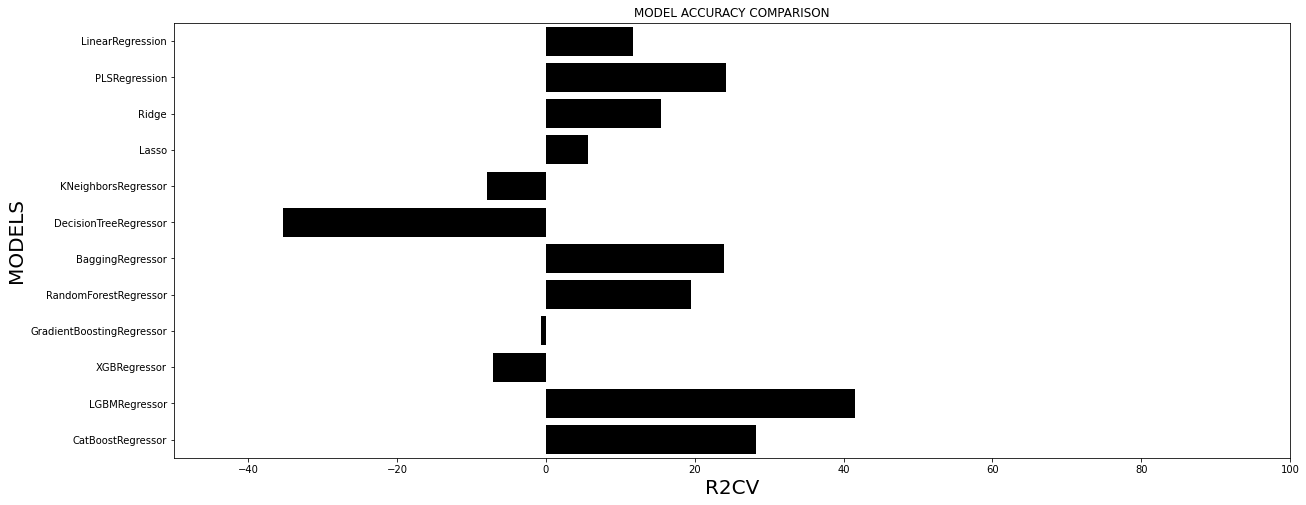

In [123]:
r = pd.DataFrame(columns=['MODELS', 'R2CV'])
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model, xTest, yTest, cv=10, scoring='r2').mean()
    result = pd.DataFrame([[name, R2CV*100]], columns=['MODELS', 'R2CV'])
    r = r.append(result)
    
figure = plt.figure(figsize=(20, 8))
sns.barplot(x='R2CV', y='MODELS', data=r, color='k')
plt.xlabel('R2CV', fontsize=20)
plt.ylabel('MODELS', fontsize=20)
plt.xlim(-50, 100)
plt.title('MODEL ACCURACY COMPARISON')
plt.show()

In [124]:
# SPECIAL REGRESSION MODELS
# OLS
ols = sm.OLS(yTrain, xTrain).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 output   R-squared (uncentered):                   0.771
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              59.41
Date:                Mon, 05 Apr 2021   Prob (F-statistic):                    8.96e-66
Time:                        13:31:11   Log-Likelihood:                         -92.436
No. Observations:                 242   AIC:                                      210.9
Df Residuals:                     229   BIC:                                      256.2
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0034      0.003      1.275      0.204      -0.002       0.009
sex           -0.1682      0.053     -3.148      0.002      -0.274      -0.063
cp             0.1042      0.026      4.030      0.000       0.053       0.155
trtbps        -0.0006      0.001     -0.420      0.675      -0.003       0.002
chol       -7.277e-05      0.000     -0.152      0.880      -0.001       0.001
fbs            0.0067      0.073      0.092      0.927      -0.138       0.151
restecg        0.0719      0.045      1.606      0.110      -0.016       0.160
thalachh       0.0045      0.001      4.387      0.000       0.002       0.007
exng          -0.1450      0.059     -2.444      0.015      -0.262      -0.028
oldpeak       -0.0572      0.028     -2.034      0.043      -0.113      -0.002
slp            0.1185      0.048      2.461      0.015       0.024       0.213
caa           -0.1123      0.026     -4.287      0.000      -0.164      -0.061
thall         -0.1065      0.042     -2.541      0.012      -0.189      -0.024
==============================================================================
Omnibus:                        6.594   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.745
Skew:                          -0.387   Prob(JB):                       0.0343
Kurtosis:                       2.737   Cond. No.                     1.03e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
# PCA
pca = PCA()      # https://qiita.com/maskot1977/items/082557fcda78c4cdb41f  多変量解析手法のうち次元削減手法としてよく用いられる手法の一種
xRTrain = pca.fit_transform(scale(xTrain))
xRTest = pca.fit_transform(scale(xTest))

In [151]:
lmP = LinearRegression().fit(xRTrain, yTrain)
R2CV = cross_val_score(lmP, xRTest, yTest, cv=10, scoring='r2').mean()
error = -cross_val_score(lmP, xRTest, yTest, cv=10, scoring='neg_mean_squared_error').mean()
print(R2CV)
print('-----'*10)
print(np.sqrt(error))

0.11758856932996486
--------------------------------------------------
0.4435589653777698


In [147]:
lmP = LinearRegression().fit(xRTrain, yTrain)
R2CV = cross_val_score(lmP, xRTest, yTest, cv=10, scoring='r2').mean()
error = -cross_val_score(lmP, xRTest, yTest, cv=10, scoring='neg_mean_squared_error').mean()
print(R2CV)
print('-----'*10)
print(np.sqrt(error))

In [148]:
mlpr = MLPRegressor().fit(xRTrain, yTrain)

R2CV = cross_val_score(mlpr, xRTest, yTest, cv=10, scoring='r2').mean()
error = -cross_val_score(mlpr, xRTest, yTest, cv=10, scoring='neg_mean_squared_error').mean()

print(R2CV)
print('-----'*10)
print(np.sqrt(error))

0.06869892508075022
--------------------------------------------------
0.42370641006892346


In [143]:
# CLASSIFICATION MODELS
lj = LogisticRegression(solver='liblinear').fit(xTrain, yTrain)
gnb = GaussianNB().fit(xTrain,  yTrain)     # http://arduinopid.web.fc2.com/Q5-29.html
knnc = KNeighborsClassifier().fit(xTrain, yTrain)
cartc = DecisionTreeClassifier(random_state=42).fit(xTrain, yTrain)
rfc = RandomForestClassifier(random_state=42, verbose=False).fit(xTrain, yTrain)
gbmc = GradientBoostingClassifier(verbose=False).fit(xTrain, yTrain)
xgbc = XGBClassifier().fit(xTrain, yTrain)
lgbmc = LGBMClassifier().fit(xTrain, yTrain)
catbc = CatBoostClassifier(verbose=False).fit(xTrain, yTrain)

[16:11:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [144]:
# COMPARISON
modelsc = [lj, gnb, knnc, cartc, rfc, gbmc, xgbc, lgbmc, catbc]

In [157]:
for model in modelsc:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    R2CV = cross_val_score(model, xTest, yTest, cv=10, verbose=False).mean() # cvはデータを何分割して検証するかを指す
    error = -cross_val_score(model, xTest, yTest, cv=10, scoring='neg_mean_squared_error', verbose=False).mean()
    print(name + ':')
    print('-'*10)
    print(accuracy_score(yTest, predict))
    print(R2CV)
    print(np.sqrt(error))
    print('-'*30)

LogisticRegression:
----------
0.8688524590163934
0.8357142857142857
0.4053217416888888
------------------------------
GaussianNB:
----------
0.8688524590163934
0.8523809523809524
0.3842122429322725
------------------------------
KNeighborsClassifier:
----------
0.6885245901639344
0.6071428571428571
0.6267831705280088
------------------------------
DecisionTreeClassifier:
----------
0.7540983606557377
0.738095238095238
0.511766315719159
------------------------------
RandomForestClassifier:
----------
0.8360655737704918
0.819047619047619
0.42538497969766276
------------------------------
GradientBoostingClassifier:
----------
0.7704918032786885
0.719047619047619
0.5300494136893097
------------------------------
[16:32:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd lik

[17:13:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

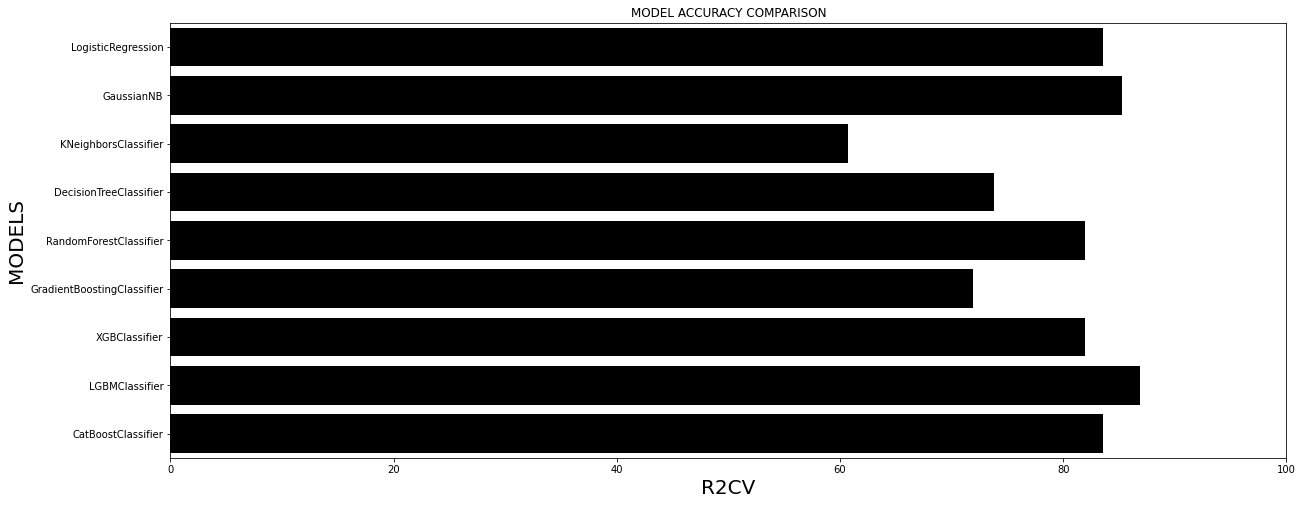

In [158]:
r = pd.DataFrame(columns=['MODELS', 'R2CV'])
for model in modelsc:
    name = model.__class__.__name__
    R2CV = cross_val_score(model, xTest, yTest, cv=10, verbose=False).mean()
    result = pd.DataFrame([[name, R2CV*100]], columns=['MODELS', 'R2CV'])
    r = r.append(result)
    
figure = plt.figure(figsize=(20, 8))
sns.barplot(x='R2CV', y='MODELS', data=r, color='k')
plt.xlabel('R2CV', fontsize=20)
plt.ylabel('MODELS', fontsize=20)
plt.xlim(0, 100)
plt.title('MODEL ACCURACY COMPARISON')
plt.show()

In [ ]:
# LGBMClassifier is the best

In [159]:
# SPECIAL CLASSIFICATION MODELS
# ANN C MODELS & ERROR & TUNING & PREDICT
scaler = StandardScaler().fit(xTrain, yTrain)
xRTrain = scaler.transform(xTrain)
xRTest = scaler.transform(xTest)

In [160]:
mlpc = MLPClassifier().fit(xRTrain, yTrain)
predict = mlpc.predict(xRTest)

R2CV = cross_val_score(mlpc, xRTest, yTest, cv=10).mean()
print(R2CV)
error = mean_squared_error(yTest, predict)
print(np.sqrt(error))

0.8523809523809524
0.3621429841700741


In [161]:
# TUNING FOR BEST MODEL
params = {"n_estimators": [100, 500, 1000, 2000],
          "subsample": [0.6, 0.8, 1.0],
          "max_depth": [3, 4, 5, 6],
          "learning_rate": [0.1, 0.01, 0.02, 0.05],
          "min_child_samples": [5, 10, 20]}

In [163]:
cv = GridSearchCV(lgbmc, params, cv=10, verbose=False, n_jobs=-1).fit(xTrain, yTrain)
print(cv.best_params_)
print(cv.best_score_)

{'learning_rate': 0.01, 'max_depth': 5, 'min_child_samples': 10, 'n_estimators': 100, 'subsample': 0.6}
0.8223333333333332


In [164]:
# FINAL MODEL
lgbmctuned = LGBMClassifier(learning_rate=0.01, max_depth=5, min_child_samples=10, 
                            n_estimators=100, subsample=0.6).fit(xTrain, yTrain)

R2CVtuned = cross_val_score(lgbmctuned, xTest, yTest, cv=10).mean()
print(R2CVtuned)
errortuned = -cross_val_score(lgbmctuned, xTest, yTest, cv=10, scoring='neg_mean_squared_error').mean()
print(np.sqrt(errortuned))

0.8523809523809524
0.3842122429322725


In [ ]:
# BEST SCORE IS STILL GaussianNB -- > 0.8688524590163934¶